In [1]:
import pandas as pd
import numpy as np

## YOUTUBE VIDEO STATS ANALYSIS AND OBJECT DETECTION

In [2]:
cmmnt_df=pd.read_csv("archive\comments.csv")
#vid_stats_df=pd.read_csv("archive\videos-stats.csv")

In [3]:
vid_stats_df=pd.read_csv(r"archive\videos-stats.csv")

In [4]:
vid_stats_df.drop(columns="Unnamed: 0",inplace=True)
vid_stats_df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [5]:
vid_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 103.0+ KB


In [6]:
cmmnt_df.drop(columns="Unnamed: 0",inplace=True)

In [7]:
cmmnt_df['Sentiment'].unique()

array([1., 0., 2.])

In [8]:
cmmnt_df.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [9]:
sent=pd.DataFrame(cmmnt_df.groupby('Video ID')['Sentiment'].mean()).reset_index()

In [10]:
sent

,Video ID,Sentiment
0,--ZI0dSbbNU,1.9
1,--hxd1CrOqg,0.2
2,--ixiTypG8g,0.2
3,-64r1hcxtV4,1.5
4,-6IgkG5yZfo,2.0
...,...,...
1864,zvS8Fmxv1_U,1.0
1865,zvkDF3Hvq-0,1.4
1866,zxYjTTXc-J8,1.9
1867,zxtl5ExJmag,1.6


In [11]:
#joining both the data frames
final_df=pd.merge(vid_stats_df,sent,how="inner",on='Video ID').reset_index(drop=True)

In [12]:
final_df.corr()

,Likes,Comments,Views,Sentiment
Likes,1.000000,0.892284,0.754475,0.034327
Comments,0.892284,1.000000,0.659654,0.014341
Views,0.754475,0.659654,1.000000,0.017128
Sentiment,0.034327,0.014341,0.017128,1.000000


In [13]:
#more the no of likes, more the no of views and comments
#sentiment doesnt have a good correlation yet

In [14]:
#does more no of likes imply positive sentiment
cmmnt_df.corr() # not significant enough

,Likes,Sentiment
Likes,1.000000,-0.027767
Sentiment,-0.027767,1.000000


<AxesSubplot:xlabel='Sentiment', ylabel='Likes'>

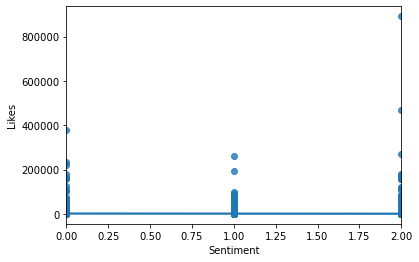

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(data=cmmnt_df, x='Sentiment', y='Likes')

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
 7   Sentiment     1881 non-null   float64
dtypes: float64(4), object(4)
memory usage: 117.7+ KB


In [17]:
final_df['Keyword'].unique()

array(['tech', 'gaming', 'news', 'minecraft', 'asmr', 'sports', 'how-to',
       'cubes', 'business', 'tutorial', 'finance', 'crypto', 'chess',
       'history', 'apple', 'google', 'interview', 'literature', 'bed',
       'trolling', 'music', 'lofi', 'reaction', 'food', 'mukbang',
       'movies', 'animals', 'education', 'sat', 'mrbeast', 'cnn',
       'mathchemistry', 'biology', 'physics', 'computer science',
       'machine learning', 'nintendo', 'xbox', 'marvel', 'data science',
       'game development'], dtype=object)

In [18]:
#which keyword has the highest average no of views,likes and sentiment
key_df=pd.DataFrame(final_df.groupby('Keyword')['Views','Likes','Sentiment'].mean()).reset_index()

<ipython-input-18-4f8066915a8e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  key_df=pd.DataFrame(final_df.groupby('Keyword')['Views','Likes','Sentiment'].mean()).reset_index()


In [19]:
top10_keyword=round(key_df.sort_values(by=['Views','Likes','Sentiment'],ascending=False))[:10]

In [20]:
top10_keyword

,Keyword,Views,Likes,Sentiment
17,google,103364971.0,471167.0,1.0
0,animals,94723961.0,760776.0,2.0
28,mrbeast,66764004.0,2105914.0,2.0
3,bed,53893229.0,473682.0,2.0
30,music,29364893.0,314188.0,2.0
18,history,15047130.0,273411.0,1.0
10,cubes,15038739.0,303061.0,1.0
29,mukbang,10904772.0,141407.0,2.0
1,apple,10746930.0,118079.0,1.0
36,sports,8601205.0,90519.0,2.0


In [21]:
import plotly.express as px

fig = px.line(top10_keyword, x="Keyword", y="Views", title='Top 10 searches in youtube',markers='o',color='Sentiment')
fig.show()

In [22]:
top10cat_df=final_df[final_df.Keyword.isin(top10_keyword['Keyword'])]

In [23]:
top10cat_df

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Sentiment
132,1000 IQ Moments in Sports,AqvyzO3IPXc,2022-03-31,sports,39944.0,1677.0,5093587.0,1.4
133,Chelsea v. Tottenham Hotspur | PREMIER LEAGUE ...,0RiGydlyTcM,2022-08-14,sports,19987.0,2358.0,1335282.0,1.6
134,Beach Bunny - Sports (Official Audio),szeXkBYq5HU,2018-01-09,sports,275577.0,5431.0,15040548.0,1.8
135,Team USA SHOCKS JAMAICA for women&#39;s 4x100 ...,MnCilaL_3yo,2022-07-24,sports,62969.0,9809.0,4288833.0,1.9
136,Craziest &quot;You Have to See It to Believe I...,jxlygT8QMGM,2022-04-18,sports,12785.0,489.0,1945140.0,1.5
...,...,...,...,...,...,...,...,...
1325,Reacting To The World’s Most Satisfying Videos!,T1QUEKLNPtA,2022-07-05,mrbeast,381271.0,14433.0,15014572.0,1.6
1326,100 Million Subscriber Livestream!,er5LLR2oCmg,2022-07-28,mrbeast,492024.0,41183.0,6968660.0,2.0
1327,"MrBeast Hit 100,000,000 Subs So I Did This...",k_Xwk6Afo1U,2022-07-30,mrbeast,201509.0,9784.0,6383519.0,2.0
1328,Giving School Supplies To The Poorest Schools ...,STiUV6XXG4E,2022-08-12,mrbeast,494889.0,23110.0,7715681.0,1.8


In [26]:
#Most viewed video in each category
for x in 